# Dropout 0.5 verzija 2 (100 epoha, bez learning rate-a)

In [11]:
import os
import cv2
import numpy as np
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
from sklearn.metrics import classification_report




Lokacija dataset-a

In [12]:
dataset_path = "../data_set"

In [13]:
classes = ["glioma_tumor", "meningioma_tumor", "no_tumor", "pituitary_tumor"]


Inicijalizacija lista za cuvanje podataka


In [14]:
data = []
labels = []

Ucitavanje slika kroz klase


In [15]:
for class_name in classes:
    class_path = os.path.join(dataset_path, "Training", class_name)
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Učitavanje slike u crno-belom formatu
        img = cv2.resize(img, (224, 224))  # Da sve slike budu 224x224px
        data.append(img)
        labels.append(classes.index(class_name))


Konvertovanje listi u numpy


In [16]:
data = np.array(data) / 255.0  # Normalizacija vrednosti piksela
data = np.expand_dims(data, axis=-1)
labels = np.array(labels)

In [17]:
X_train, X_val, y_train, y_val = train_test_split(data, labels, test_size=0.2, random_state=42)


ImageDataGenerator za data augmentation


In [18]:
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode="nearest"
)

CNN model sa Dropout slojem


In [19]:
from tensorflow.keras.layers import Dropout

model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))  # Dodajemo Dropout sloj sa dropout rate-om 0.5
model.add(Dense(len(classes), activation='softmax'))

In [20]:

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [21]:
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=100, validation_data=(X_val, y_val))


Epoch 1/100


/home/teki/.local/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


72/72 ━━━━━━━━━━━━━━━━━━━━ 105s 1s/step - accuracy: 0.3345 - loss: 1.3708 - val_accuracy: 0.5348 - val_loss: 1.1697
Epoch 2/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 106s 1s/step - accuracy: 0.4281 - loss: 1.2231 - val_accuracy: 0.5209 - val_loss: 1.1272
Epoch 3/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.4460 - loss: 1.2076 - val_accuracy: 0.5923 - val_loss: 1.0483
Epoch 4/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.5212 - loss: 1.1026 - val_accuracy: 0.5714 - val_loss: 1.0104
Epoch 5/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.5076 - loss: 1.0804 - val_accuracy: 0.6498 - val_loss: 0.9181
Epoch 6/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 108s 1s/step - accuracy: 0.5875 - loss: 0.9952 - val_accuracy: 0.6463 - val_loss: 0.8362
Epoch 7/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.5709 - loss: 1.0028 - val_accuracy: 0.6551 - val_loss: 0.8152
Epoch 8/100
72/72 ━━━━━━━━━━━━━━━━━━━━ 107s 1s/step - accuracy: 0.5942 - loss: 0.9425 - val_accuracy: 0.5070 - val_l

Evaluacija modela na test skupu

In [22]:
test_data = []
test_labels = []

In [23]:
for class_name in classes:
    class_path = os.path.join(dataset_path, "Testing", class_name)
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)  # Učitavanje slike u crno-belom formatu
        img = cv2.resize(img, (224, 224))
        test_data.append(img)
        test_labels.append(classes.index(class_name))


In [24]:
test_data = np.array(test_data) / 255.0
test_data = np.expand_dims(test_data, axis=-1)
test_labels = np.array(test_labels)

Classification report

In [35]:
from sklearn.metrics import classification_report

predictions = model.predict(test_data)
predicted_classes = np.argmax(predictions, axis=1)

13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 255ms/step


In [36]:
report = classification_report(test_labels, predicted_classes, target_names=classes)
print("Classification Report:")
print(report)

Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.89      0.17      0.29       100
meningioma_tumor       0.57      0.54      0.56       115
        no_tumor       0.43      0.95      0.60       105
 pituitary_tumor       0.89      0.43      0.58        74

        accuracy                           0.54       394
       macro avg       0.70      0.52      0.50       394
    weighted avg       0.68      0.54      0.50       394



Preciznost je visoka za glioma tumore i pituitary tumore, ali niska za meningioma tumore i slike bez tumora, što znači da model često daje pogrešne pozitivne predikcije za ove klase.

Odziv je visok za slike bez tumora, ali nizak za glioma tumore, meningioma tumore, i pituitary tumore, što znači da model propušta veliki broj stvarnih slučajeva ovih tumora.

F1-score vrednosti pokazuju da model ima slabe performanse za sve klase, posebno za glioma tumore i meningioma tumore.

Kreiranje tabele sa rezultatima


In [37]:
train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
val_loss, val_accuracy = model.evaluate(X_val, y_val, verbose=0)
test_loss, test_accuracy = model.evaluate(test_data, test_labels, verbose=0)


13/13 ━━━━━━━━━━━━━━━━━━━━ 3s 244ms/step - accuracy: 0.3870 - loss: 6.9001


In [28]:
results = {
    "Model": ["CNN - Dropout(0.5)v2"],
    "Train Loss": [train_loss],
    "Train Accuracy": [train_accuracy],
    "Validation Loss": [val_loss],
    "Validation Accuracy": [val_accuracy],
    "Test Loss": [test_loss],
    "Test Accuracy": [test_accuracy]
}

In [29]:
results_df = pd.DataFrame(results)

# Čuvanje tabele rezultata kao CSV fajl
results_df.to_csv("model_results_dropout0_5v2.csv", index=False)

In [30]:
print(results_df)

                Model  Train Loss  Train Accuracy  Validation Loss  \
0  CNN - Dropout(0.5)    0.258426        0.903746         0.308476   

   Validation Accuracy  Test Loss  Test Accuracy  
0             0.878049   3.942395       0.535533  


Rezultati

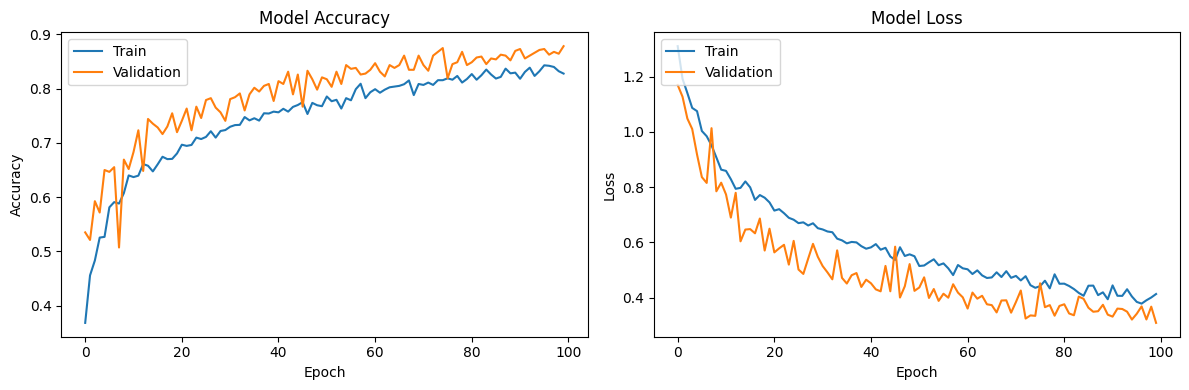

In [31]:
# train history
plt.figure(figsize=(12, 4))

# training, validation accuracy 
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# training, validation loss 
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

**Accuracy**

Tacnost na trening i validacionom skupu postepeno raste. Oko 60te epohe pocinje da se stabilizuje sto nam govori da su one verovatno nepotrebne i da bi trebalo ranije zaustaviti treniranje

**Loss**

Nakon početnog pada, greska na oba seta pokazuje tendenciju konvergencije, posebno nakon 60. epohe sto nam takodje govori da nije bilo potrebno trenirati model ovoliko dugo